# Computer Vision and Object Detection

Computer Vision API를 사용해서 이미지속에 있는 사물을 인식하는 데모 입니다.
네트워크 통신을 위해서 requests 패키지를 import 합니다.

In [1]:
import requests

이미지처리를 위해서 matplotlib.pyplot, Image, BytesIO 세 개의 패키지를 import 합니다.
matplotlib.pyplot는 import 할 때 시간이 조금 걸릴 수 있습니다.

In [2]:
import matplotlib.pyplot as plt
from PIL import Image
from io import BytesIO

In [3]:
import json

Subscription Key와 접속에 URL을 설정합니다.

In [4]:
subscription_key = '234a97e32f8447c19fbf3836053ff32c'

In [5]:
vision_base_url = 'https://daeguaivision00.cognitiveservices.azure.com/vision/v2.0/'

In [6]:
analyze_url = vision_base_url + 'analyze'

In [7]:
image_url ='http://newsimg.hankookilbo.com/2020/01/15/202001152148333427_2.jpg'

In [8]:
response = requests.get(image_url)

In [9]:
image = Image.open(BytesIO(response.content))

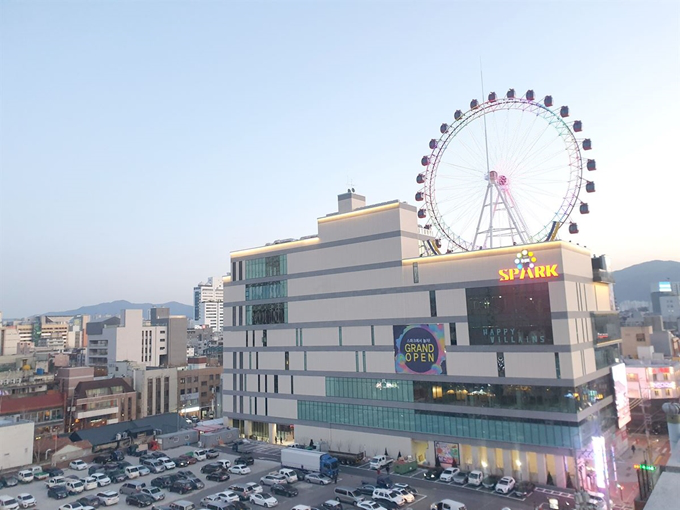

In [10]:
image

In [11]:
headers = {'Ocp-Apim-Subscription-Key' : subscription_key }
params = {'visualFeatures':'Categories,Description,Color'}
data = {'url':image_url}

In [12]:
response = requests.post(analyze_url, headers=headers, params=params, 
                         json=data)

In [13]:
analysis = response.json()

분석 결과 입니다. 분석결과에는 랜드마크를 비롯해서 인지한 개체들과 문장으로 구성된 결과가 포함 되어 있습니다.

In [14]:
analysis

{'categories': [{'name': 'building_',
   'score': 0.5078125,
   'detail': {'landmarks': []}},
  {'name': 'outdoor_', 'score': 0.02734375, 'detail': {'landmarks': []}}],
 'color': {'dominantColorForeground': 'Grey',
  'dominantColorBackground': 'White',
  'dominantColors': ['White', 'Grey'],
  'accentColor': '336299',
  'isBwImg': False,
  'isBWImg': False},
 'description': {'tags': ['outdoor',
   'car',
   'parked',
   'city',
   'street',
   'large',
   'sitting',
   'truck',
   'lot',
   'green',
   'table',
   'harbor',
   'people',
   'water',
   'boat',
   'parking',
   'group',
   'man',
   'train',
   'bus',
   'track',
   'road'],
  'captions': [{'text': 'a large city', 'confidence': 0.9024650226420484}]},
 'requestId': 'd8871750-1d4d-40c1-a099-040a5f455ca0',
 'metadata': {'height': 510, 'width': 680, 'format': 'Jpeg'}}

In [16]:
analysis['description']['captions'][0]['text']

'a large city'

# Object Detection

In [17]:
objectDetection_url = vision_base_url + 'detect'

In [41]:
object_image = 'http://tong.visitkorea.or.kr/cms/resource_etc/67/2597467_image_1.jpg'

In [42]:
img = Image.open(BytesIO(requests.get(object_image).content))

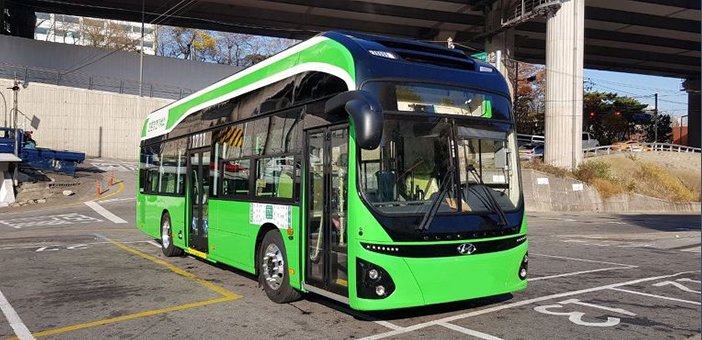

In [43]:
img

In [44]:
headers = {'Ocp-Apim-Subscription-Key': subscription_key}
data = {'url':object_image}

In [45]:
response = requests.post(objectDetection_url,
                        headers = headers,
                        json = data)

In [46]:
detectionResult = response.json()

In [47]:
detectionResult

{'objects': [{'rectangle': {'x': 150, 'y': 30, 'w': 376, 'h': 270},
   'object': 'shuttle bus',
   'confidence': 0.866,
   'parent': {'object': 'bus',
    'confidence': 0.904,
    'parent': {'object': 'Land vehicle',
     'confidence': 0.928,
     'parent': {'object': 'Vehicle', 'confidence': 0.929}}}}],
 'requestId': '05345396-f27d-466a-b232-a9f625b1bfb1',
 'metadata': {'height': 340, 'width': 702, 'format': 'Jpeg'}}

In [48]:
from PIL import Image, ImageDraw, ImageFont

In [51]:
draw = ImageDraw.Draw(img)

objects = detectionResult['objects']

for obj in objects:
    print(obj)
    
    rect = obj['rectangle']
    
    x = rect['x']
    y = rect['y']
    w = rect['w']
    h = rect['h']
    
    #사각혀을 그리는 코드
    draw.rectangle(((x, y), (x + w, y + h)), outline='red')
    
    #글자를 입력하는 코드
    objectName = obj['object']
    draw.text((x,y), objectName, fill='red')

{'rectangle': {'x': 150, 'y': 30, 'w': 376, 'h': 270}, 'object': 'shuttle bus', 'confidence': 0.866, 'parent': {'object': 'bus', 'confidence': 0.904, 'parent': {'object': 'Land vehicle', 'confidence': 0.928, 'parent': {'object': 'Vehicle', 'confidence': 0.929}}}}


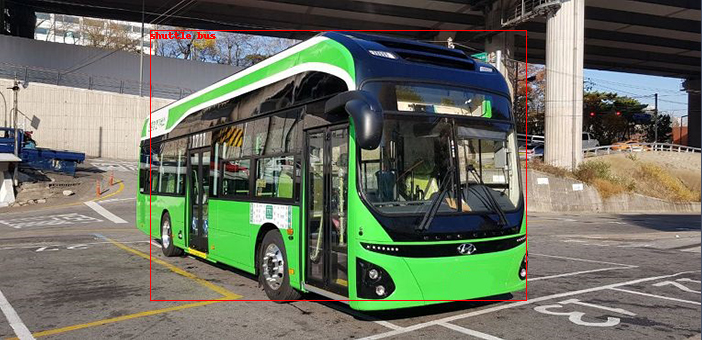

In [52]:
img